In [1]:
# Import required libraries

import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay , classification_report , roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.combine import SMOTEENN

In [2]:
# Load dataset

df=pd.read_csv("/Users/apple/Downloads/telco_churn_data.csv")

In [3]:
display(df)

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_grp_1-12,tenure_grp_13-24,tenure_grp_25-36,tenure_grp_37-48,tenure_grp_49-60,tenure_grp_61-72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,0,84.80,1990.50,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,7039,0,103.20,7362.90,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,7040,0,29.60,346.45,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
7030,7041,1,74.40,306.60,1,0,1,0,1,1,...,0,0,0,1,1,0,0,0,0,0


In [4]:
# Remove unidentified column "Unnamed"
df.drop(["Unnamed: 0"], axis=1, inplace=True)
display(df)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_grp_1-12,tenure_grp_13-24,tenure_grp_25-36,tenure_grp_37-48,tenure_grp_49-60,tenure_grp_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0


In [5]:
# Creating X and Y variable. X=Predictors/features variable and Y=Target variable

Y=df["Churn"]
X=df.drop(["Churn"], axis=1)
print(f"X variable has {X.shape[0]} rows and {X.shape[1]} columns.")
print(f"Y variable has {Y.shape[0]} rows.")

X variable has 7032 rows and 50 columns.
Y variable has 7032 rows.


In [6]:
X

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_grp_1-12,tenure_grp_13-24,tenure_grp_25-36,tenure_grp_37-48,tenure_grp_49-60,tenure_grp_61-72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [7]:
Y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [8]:
# Split data into training and testing set

x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.2)

**Algorithms**

**Decision Tree**

In [9]:
model_dtc=DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=100, min_samples_leaf=8)

In [10]:
model_dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [11]:
y_pred=model_dtc.predict(x_test)

In [12]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

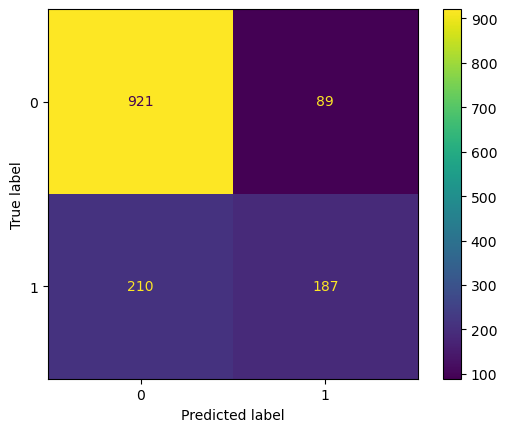

In [13]:
ConfusionMatrixDisplay.from_estimator(
        model_dtc,
        x_test,
        y_test
    )

In [14]:
print(classification_report(
        y_test,
        model_dtc.predict(x_test)
    ))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1010
           1       0.68      0.47      0.56       397

    accuracy                           0.79      1407
   macro avg       0.75      0.69      0.71      1407
weighted avg       0.78      0.79      0.77      1407



In [15]:
# F1-score for class "1":"yes" is poor compared to the other class. This is due to the imbalance dataset with ratio 73:27 for the target variable in the EDA section.\
# to solve this problem, Smote-enn is used to balance the dataset by sampling(over/under)

sm=SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(X, Y)

In [16]:
# split the resampled data

xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size=0.2)

In [17]:
# develop model with the resampled data
# Decision tree classifier

model_dtc_smote=DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=100, min_samples_leaf=8)
model_dtc_smote.fit(xr_train, yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [18]:
# predict target variable for test set

yr_pred_dtc=model_dtc_smote.predict(xr_test)

In [19]:
yr_pred_dtc

array([0, 1, 0, ..., 1, 1, 1])

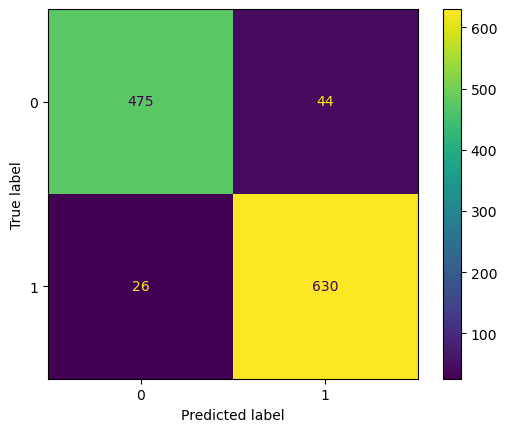

In [20]:
ConfusionMatrixDisplay.from_estimator(
        model_dtc_smote,
        xr_test,
        yr_test
    )

In [21]:
 print(classification_report(
        yr_test,
        model_dtc_smote.predict(xr_test)))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       519
           1       0.93      0.96      0.95       656

    accuracy                           0.94      1175
   macro avg       0.94      0.94      0.94      1175
weighted avg       0.94      0.94      0.94      1175



In [22]:
model_dtc.score(x_test,y_test)

0.7874911158493249

In [24]:
print(accuracy_score(y_test, y_pred))

0.7874911158493249


In [23]:
model_dtc_smote.score(xr_test,yr_test)

0.9404255319148936

In [27]:
print(accuracy_score(yr_test, yr_pred_dtc))

0.9404255319148936


The model (**model_dtc_smote**) trained with the resampled data performs better with 92.8% score than the model (**model_dtc**) trained with the imbalanced data with score of 78.6%. Going further with training other models, the resampled data will be used for training;

**Logistic Regression**

In [28]:
lr=LogisticRegression(max_iter=2000)

In [29]:
lr.fit(xr_train, yr_train)

LogisticRegression(max_iter=2000)

In [30]:
y_pred_lr=lr.predict(xr_test)

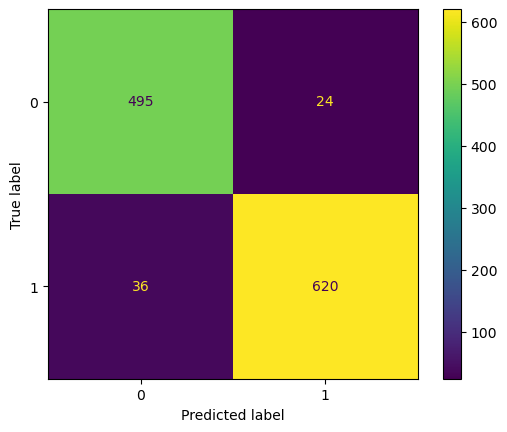

In [31]:
ConfusionMatrixDisplay.from_estimator(
        lr,
        xr_test,
        yr_test
    )

In [32]:
 print(classification_report(
        yr_test,
        lr.predict(xr_test)))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       519
           1       0.96      0.95      0.95       656

    accuracy                           0.95      1175
   macro avg       0.95      0.95      0.95      1175
weighted avg       0.95      0.95      0.95      1175



In [33]:
lr.score(xr_test,yr_test)

0.948936170212766

**Support Vector Machines**

In [34]:
svm=SVC()

In [35]:
svm.fit(xr_train, yr_train)

SVC()

In [38]:
y_pred_svm=svm.predict(xr_test)

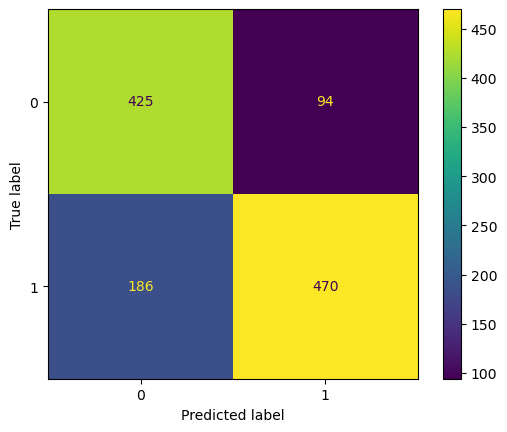

In [39]:
ConfusionMatrixDisplay.from_estimator(
        svm,
        xr_test,
        yr_test
    )

In [40]:
 print(classification_report(
        yr_test,
        svm.predict(xr_test)))

              precision    recall  f1-score   support

           0       0.70      0.82      0.75       519
           1       0.83      0.72      0.77       656

    accuracy                           0.76      1175
   macro avg       0.76      0.77      0.76      1175
weighted avg       0.77      0.76      0.76      1175



In [41]:
print(accuracy_score(yr_test, y_pred_svm))

0.7617021276595745


In [47]:
# Using GridSearchCV for hyperparameter tuning using the resampled set, to find the optimal combination of hyperparameters
# that minimizes  a predefined loss function to give better results
"""  
params_grid_svm={
    'C':[0.1, 1, 10, 100],
    'gamma':[1, 0.1, 0.01, 0.001],
    'kernel':['linear', 'rbf', 'poly', 'sigmoid'],
    'class_weight':['balanced']
}


svm_grid_model=GridSearchCV(estimator=SVC(random_state=42, probability=True),
                           param_grid=params_grid_svm, verbose=1, cv=10, n_jobs=-1)
svm_grid_model.fit(xr_train, yr_train)
"""

"  \nparams_grid_svm={\n    'C':[0.1, 1, 10, 100],\n    'gamma':[1, 0.1, 0.01, 0.001],\n    'kernel':['linear', 'rbf', 'poly', 'sigmoid'],\n    'class_weight':['balanced']\n}\n\n\nsvm_grid_model=GridSearchCV(estimator=SVC(random_state=42, probability=True),\n                           param_grid=params_grid_svm, verbose=1, cv=10, n_jobs=-1)\nsvm_grid_model.fit(xr_train, yr_train)\n"

**Random Forest Classifier**

In [48]:
clf= RandomForestClassifier(random_state=42)
params={
    "n_estimators": range(50,125,25),
    "max_depth": range(60,81,2)}

rfc_model = GridSearchCV(
    clf,
    param_grid = params,
    cv = 10,
    n_jobs= -1,
    verbose=1)

rfc_model.fit(xr_train,yr_train)

Fitting 10 folds for each of 33 candidates, totalling 330 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(60, 81, 2),
                         'n_estimators': range(50, 125, 25)},
             verbose=1)

In [49]:
cv_results= pd.DataFrame(rfc_model.cv_results_)
cv_results.sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
32,1.006459,0.082799,0.041199,0.015032,80,100,"{'max_depth': 80, 'n_estimators': 100}",0.965957,0.951064,0.944681,0.955319,0.965957,0.965957,0.959574,0.938298,0.959488,0.955224,0.956152,0.008883,1
29,0.967763,0.046853,0.044148,0.008854,78,100,"{'max_depth': 78, 'n_estimators': 100}",0.965957,0.951064,0.944681,0.955319,0.965957,0.965957,0.959574,0.938298,0.959488,0.955224,0.956152,0.008883,1
2,0.959079,0.067776,0.042883,0.006444,60,100,"{'max_depth': 60, 'n_estimators': 100}",0.965957,0.951064,0.944681,0.955319,0.965957,0.965957,0.959574,0.938298,0.959488,0.955224,0.956152,0.008883,1
26,1.020646,0.032136,0.046958,0.013397,76,100,"{'max_depth': 76, 'n_estimators': 100}",0.965957,0.951064,0.944681,0.955319,0.965957,0.965957,0.959574,0.938298,0.959488,0.955224,0.956152,0.008883,1
5,1.081767,0.123653,0.047526,0.009316,62,100,"{'max_depth': 62, 'n_estimators': 100}",0.965957,0.951064,0.944681,0.955319,0.965957,0.965957,0.959574,0.938298,0.959488,0.955224,0.956152,0.008883,1
23,1.307911,0.146155,0.057390,0.021726,74,100,"{'max_depth': 74, 'n_estimators': 100}",0.965957,0.951064,0.944681,0.955319,0.965957,0.965957,0.959574,0.938298,0.959488,0.955224,0.956152,0.008883,1
8,0.956782,0.033210,0.047626,0.008861,64,100,"{'max_depth': 64, 'n_estimators': 100}",0.965957,0.951064,0.944681,0.955319,0.965957,0.965957,0.959574,0.938298,0.959488,0.955224,0.956152,0.008883,1
20,1.052883,0.033880,0.043674,0.005910,72,100,"{'max_depth': 72, 'n_estimators': 100}",0.965957,0.951064,0.944681,0.955319,0.965957,0.965957,0.959574,0.938298,0.959488,0.955224,0.956152,0.008883,1
11,1.431777,0.168018,0.057225,0.008171,66,100,"{'max_depth': 66, 'n_estimators': 100}",0.965957,0.951064,0.944681,0.955319,0.965957,0.965957,0.959574,0.938298,0.959488,0.955224,0.956152,0.008883,1
17,1.328636,0.101937,0.062090,0.029016,70,100,"{'max_depth': 70, 'n_estimators': 100}",0.965957,0.951064,0.944681,0.955319,0.965957,0.965957,0.959574,0.938298,0.959488,0.955224,0.956152,0.008883,1


In [50]:
rfc_model.best_params_

{'max_depth': 60, 'n_estimators': 100}

In [51]:
y_pred_rfc = rfc_model.predict(xr_test)

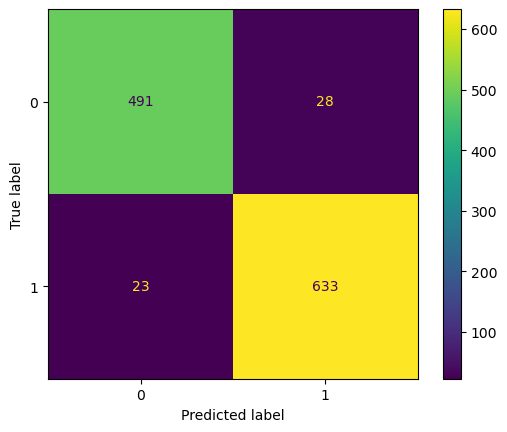

In [52]:
ConfusionMatrixDisplay.from_estimator(
        rfc_model,
        xr_test,
        yr_test
    )

In [53]:
 print(classification_report(
        yr_test,
        rfc_model.predict(xr_test)))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       519
           1       0.96      0.96      0.96       656

    accuracy                           0.96      1175
   macro avg       0.96      0.96      0.96      1175
weighted avg       0.96      0.96      0.96      1175



In [54]:
print(accuracy_score(yr_test, y_pred_rfc))

0.9565957446808511


**Model Evaluation**

In [55]:
models = pd.DataFrame({
    
    "Models": ["Logistic Regression" , "SVM", "DecisionTreeClassifier","RandomForestClassifier"],
    "Score":[lr.score(xr_test,yr_test) ,svm.score(xr_test,yr_test), model_dtc_smote.score(xr_test,yr_test), rfc_model.score(xr_test,yr_test)]
})
display(models.sort_values(by="Score" , ascending=False))

,Models,Score
3,RandomForestClassifier,0.956596
0,Logistic Regression,0.948936
2,DecisionTreeClassifier,0.940426
1,SVM,0.761702


In [60]:
print(f"The Random Forest model performed best with a score of {round(rfc_model.score(xr_test,yr_test) * 100, 2)}% accuracy.")

The Random Forest model performed best with a score of 95.66% accuracy.


In [63]:
# save the best performiming model
import pickle
filename = 'model.rfc'
pickle.dump(rfc_model, open(filename, 'wb')) #wb=write mode

In [64]:
# load saved model
load_model=pickle.load(open(filename, 'rb')) #rb=read mode

In [65]:
load_model.score(xr_test, yr_test)

0.9565957446808511